In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
import os

# sc.set_figure_params(figsize=(8,8), fontsize=15, )
# sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
# sc.logging.print_header()
# sc.settings.set_figure_params(dpi=80, facecolor='white')
# import warnings
# warnings.filterwarnings("ignore")

In [6]:
# Get the file path from the environment variable
file_path_env = os.getenv('MY_FACS_DATA_PATH')
input_file1 = os.path.join(file_path_env,'sara_data',"adata_ref_sara_2M.h5ad")
input_file2 = os.path.join(file_path_env,'sara_data', 'reps',"random_adata_2_30__0.h5ad")
input_file3 = os.path.join(file_path_env,'sara_data', 'reps',"fsbs_adata_2_30__0.h5ad")

# super_cell_cyto/explore_supercell_purity_clustering


adata_ref = sc.read_h5ad(input_file1)
adata_random = sc.read_h5ad(input_file2)
adata_fsbs = sc.read_h5ad(input_file3)
# adata_random.obs.reset_index(drop=True, inplace=True)

In [7]:
adata_ref.obs['subtype'].value_counts()

subtype
nk,_npm1+_flt3_itd_(>0,5)       250722
nk,_npm1+                       217489
nk,_npm1_wt;_flt3_itd_(<0,5)    187393
nk,_npm1+_flt3_itd_(<0,5)       177926
inv(16)                         176177
trisomy_8                       150434
nk,_npm1_wt,_flt3_wt            140921
apl                             117994
complex,_tp53                   108937
idh2                             85990
nk,_npm1_wt;_flt3_itd_(>0,5)     70358
t(8;21),_c_kit                   66700
nk,_cebpa                        55132
healthy                          50697
evi1                             43388
del5                             42351
complex,_del5                    27661
t(8;21)                          27159
idh1                              2571
Name: count, dtype: int64

In [8]:
adata_fsbs.obs['subtype'].value_counts()

subtype
nk,_npm1_wt;_flt3_itd_(<0,5)    13567
nk,_npm1+                       12537
inv(16)                         12064
nk,_npm1+_flt3_itd_(>0,5)       11988
nk,_npm1+_flt3_itd_(<0,5)       11049
nk,_npm1_wt,_flt3_wt             7889
trisomy_8                        7725
complex,_tp53                    6233
idh2                             6113
apl                              5954
healthy                          5022
nk,_npm1_wt;_flt3_itd_(>0,5)     4806
t(8;21),_c_kit                   3276
evi1                             3194
nk,_cebpa                        3151
del5                             2597
complex,_del5                    2497
t(8;21)                          1851
idh1                              163
Name: count, dtype: int64

In [9]:
adata_random.obs['subtype'].value_counts()

subtype
nk,_npm1+_flt3_itd_(>0,5)       15252
nk,_npm1+                       13257
nk,_npm1_wt;_flt3_itd_(<0,5)    11435
nk,_npm1+_flt3_itd_(<0,5)       10928
inv(16)                         10669
trisomy_8                        9048
nk,_npm1_wt,_flt3_wt             8555
apl                              7202
complex,_tp53                    6723
idh2                             5289
nk,_npm1_wt;_flt3_itd_(>0,5)     4179
t(8;21),_c_kit                   3965
nk,_cebpa                        3343
healthy                          3091
evi1                             2616
del5                             2497
t(8;21)                          1747
complex,_del5                    1732
idh1                              148
Name: count, dtype: int64

In [18]:
import matplotlib.pyplot as plt

def bubble_plot(adata, name='ref_2M'):

    df = adata.obs


    # Group by the two variables and count the frequencies
    frequency_df = df.groupby(['subtype', 'population']).size().reset_index(name='counts')

    # Assuming frequency_df is your DataFrame with 'subtype', 'population', and 'counts'

    # Adjust the bubble sizes to make them relative to the plot size and not overlap too much
    max_bubble_size = 2000  # This is an example maximum size for the largest bubble
    frequency_df['scaled_sizes'] = (frequency_df['counts'] / frequency_df['counts'].max()) * max_bubble_size

    # Create the bubble plot with improved aesthetics
    fig, ax = plt.subplots(figsize=(14, 10))

    # Map the counts to sizes
    scatter = ax.scatter(frequency_df['subtype'], frequency_df['population'], 
                         s=frequency_df['scaled_sizes'], alpha=0.5, edgecolors='w', linewidth=0.5)

    # Rotate x-axis labels to avoid overlap
    plt.xticks(rotation=90)

    # Improve the y-axis labels readability
    plt.yticks(fontsize=8)

    # Add grid
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Set background color
    ax.set_facecolor('whitesmoke')

    # Set the margins to provide space for the rotated x-axis labels
    plt.gcf().subplots_adjust(bottom=0.15)

    # Optional: add a color bar to represent another variable
    # plt.colorbar(scatter, label='Another Variable')

    plt.xlabel('Subtype', fontsize=12)
    plt.ylabel('Population', fontsize=12)
    plt.title(f'{name} Bubble Plot of Frequency Counts', fontsize=14)

    # Save the plot with a high DPI for better resolution
    # plt.savefig('improved_bubble_plot.png', dpi=300)

    plt.show()


/tmp/6627373.1.all.q/ipykernel_23659/2507129719.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_df = df.groupby(['subtype', 'population']).size().reset_index(name='counts')


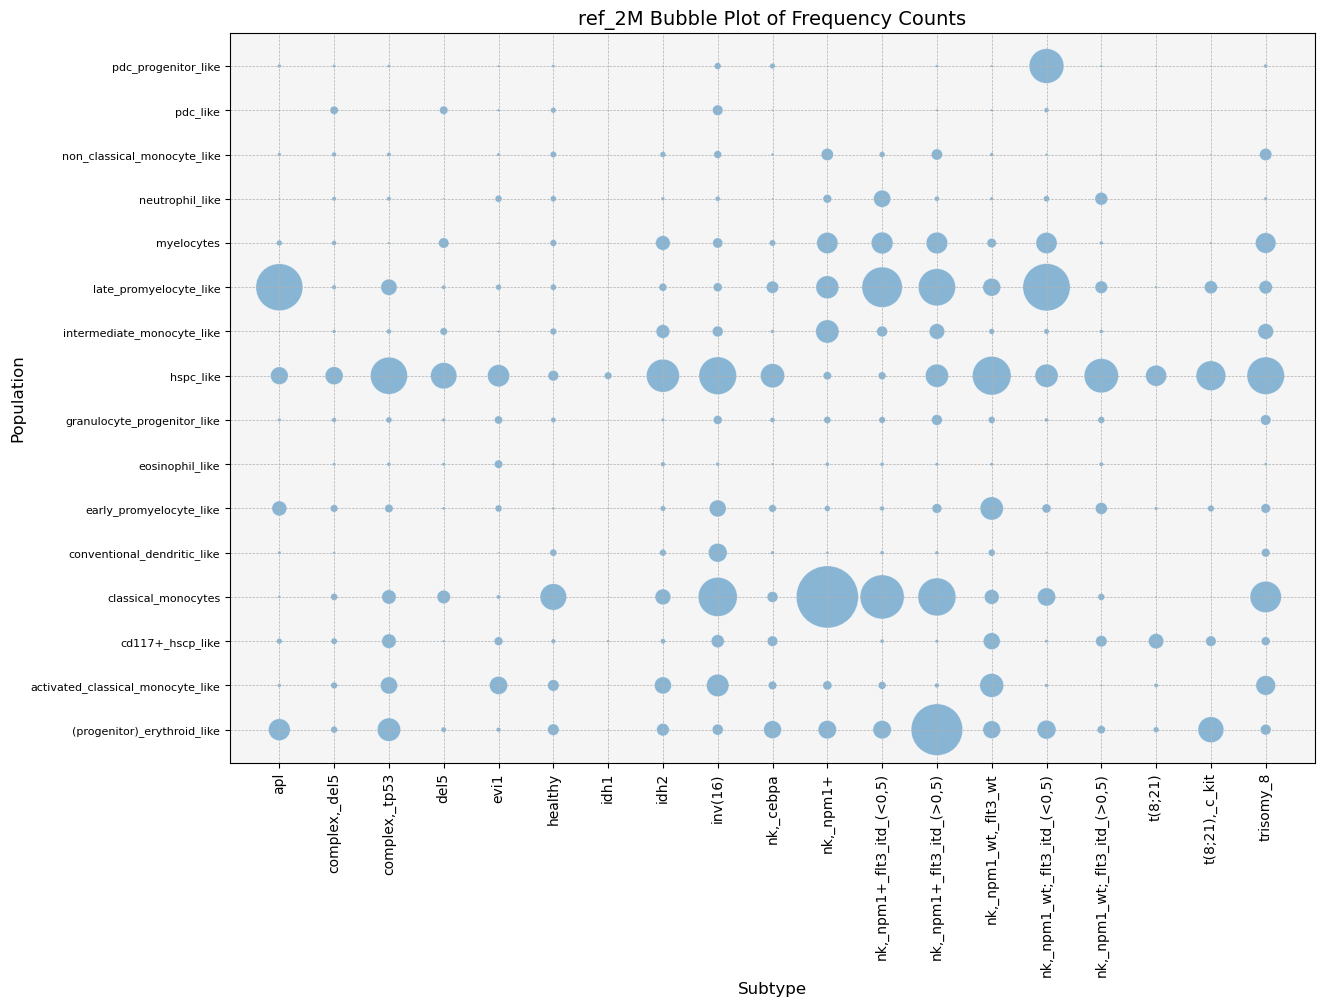

In [19]:
bubble_plot(adata_ref)

/tmp/6627373.1.all.q/ipykernel_23659/2507129719.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_df = df.groupby(['subtype', 'population']).size().reset_index(name='counts')


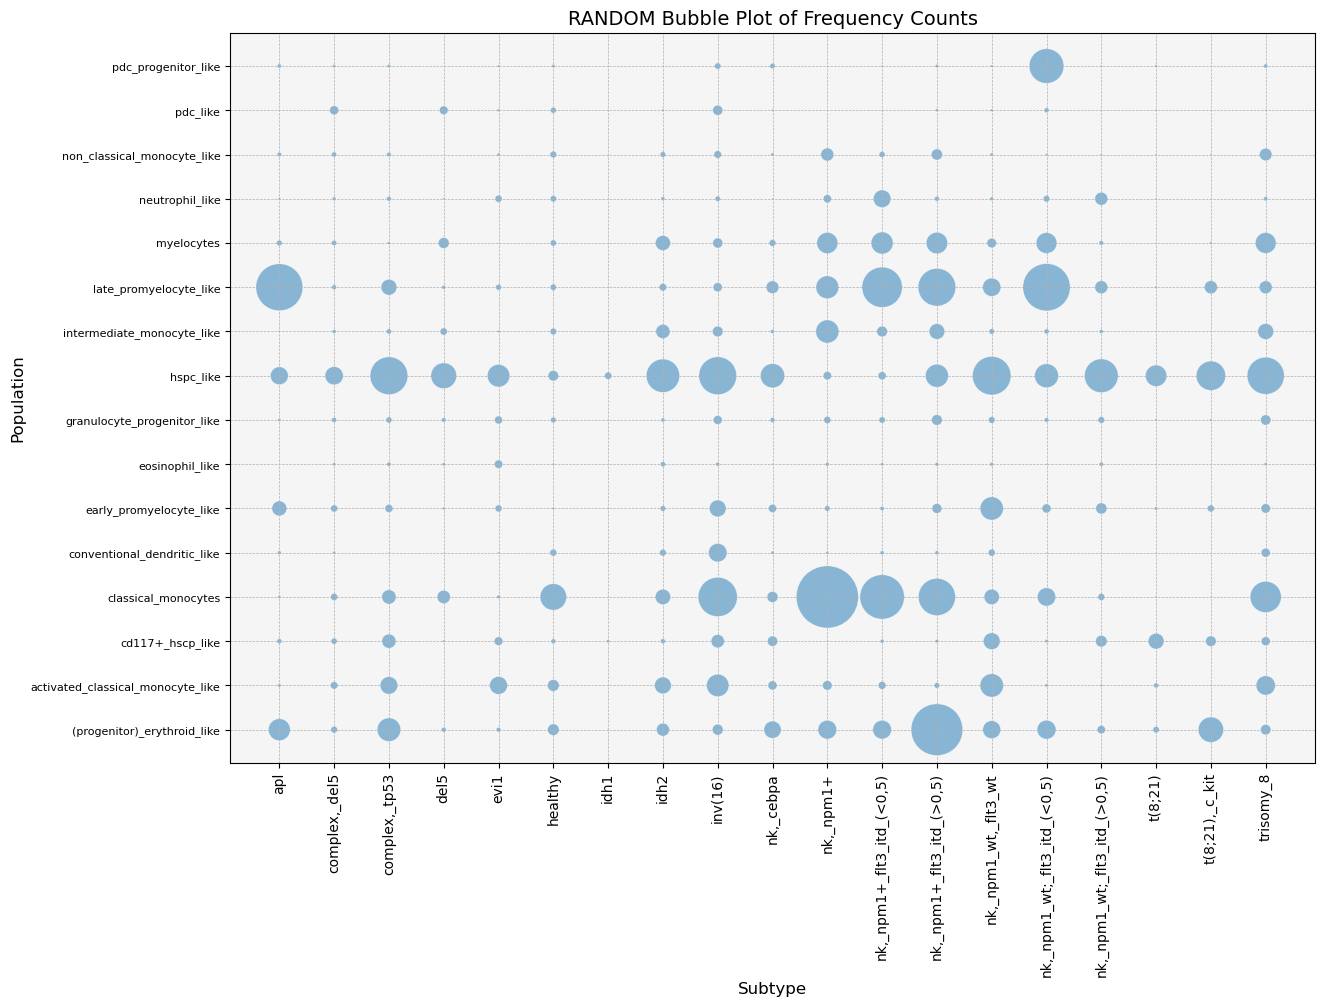

In [20]:
bubble_plot(adata_random, name='RANDOM')

/tmp/6627373.1.all.q/ipykernel_23659/2507129719.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  frequency_df = df.groupby(['subtype', 'population']).size().reset_index(name='counts')


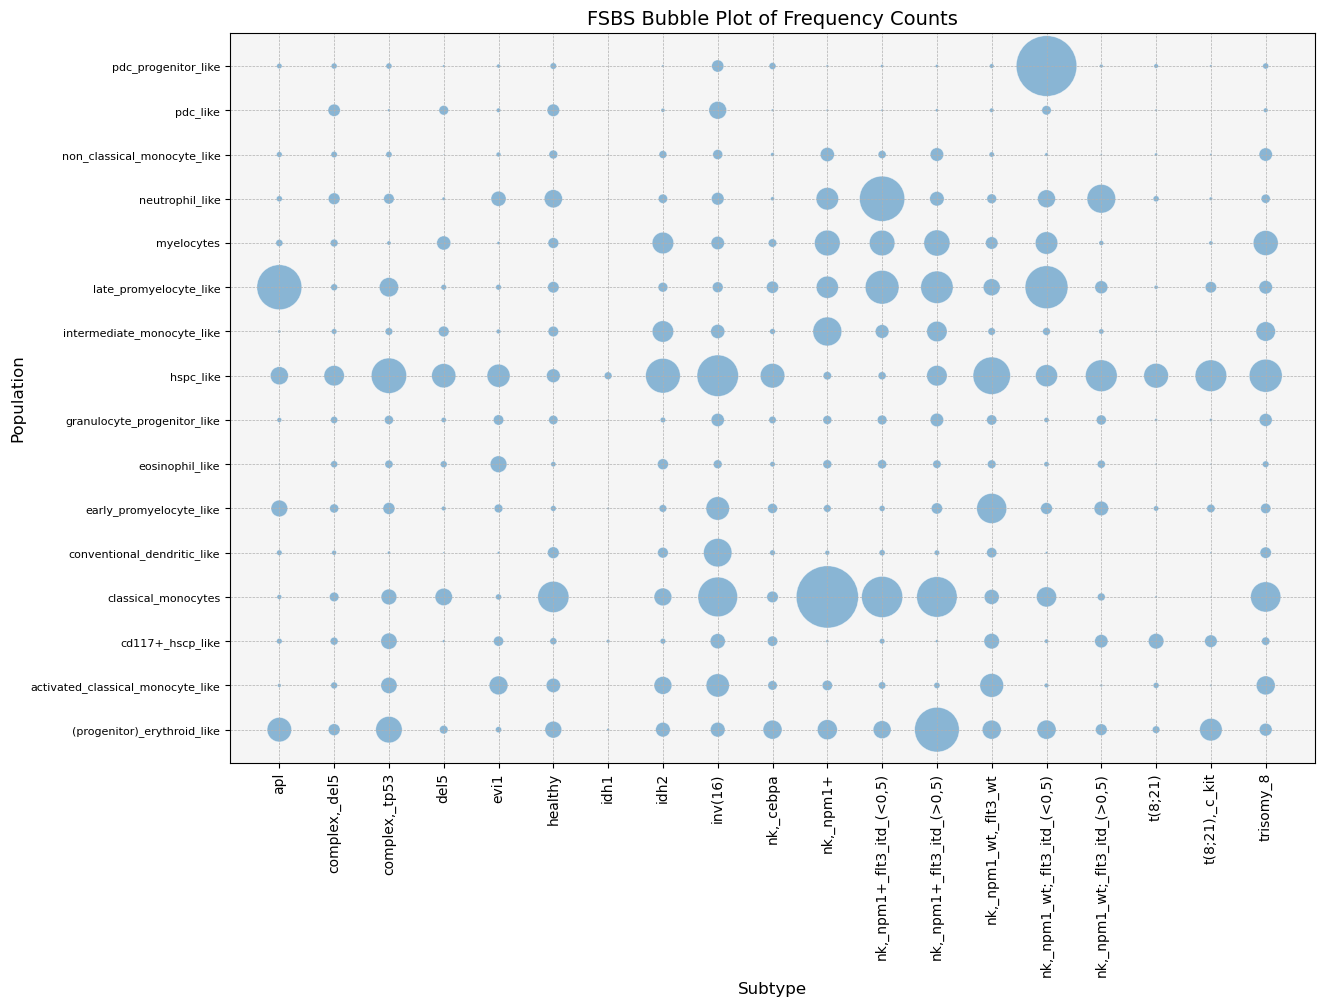

In [21]:
bubble_plot(adata_fsbs, name='FSBS')